<a href="https://colab.research.google.com/github/VadPA/Introduction_to_AI/blob/master/mono2color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.layers import Conv2D, UpSampling2D, InputLayer
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [6]:
from skimage.color import rgb2lab, lab2rgb

In [38]:
upl = files.upload()
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))

Saving img_1_2.jpg to img_1_2 (3).jpg


In [17]:
def processed_image(img):
  image = img.resize((256, 256), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [39]:
X, Y, size = processed_image(img)

In [33]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))

In [40]:
model.compile(optimizer='adam', loss='mse')
model.fit(x=X, y=Y, batch_size=1, epochs=95)

Epoch 1/95
1/1 [==============================] - 2s 2s/step - loss: 0.0228
Epoch 2/95
1/1 [==============================] - 1s 1s/step - loss: 0.0673
Epoch 3/95
1/1 [==============================] - 1s 1s/step - loss: 0.0601
Epoch 4/95
1/1 [==============================] - 1s 1s/step - loss: 0.0419
Epoch 5/95
1/1 [==============================] - 1s 1s/step - loss: 0.0275
Epoch 6/95
1/1 [==============================] - 1s 1s/step - loss: 0.0251
Epoch 7/95
1/1 [==============================] - 1s 1s/step - loss: 0.0249
Epoch 8/95
1/1 [==============================] - 1s 1s/step - loss: 0.0244
Epoch 9/95
1/1 [==============================] - 1s 1s/step - loss: 0.0229
Epoch 10/95
1/1 [==============================] - 1s 1s/step - loss: 0.0198
Epoch 11/95
1/1 [==============================] - 1s 1s/step - loss: 0.0280
Epoch 12/95
1/1 [==============================] - 1s 1s/step - loss: 0.0311
Epoch 13/95
1/1 [==============================] - 1s 1s/step - loss: 0.0218
Epoch 14

In [41]:
upl = files.upload()

Saving img_1_2_gray.jpg to img_1_2_gray (3).jpg


In [42]:
names = list(upl.keys())
img = Image.open(BytesIO(upl[names[0]]))
X, Y, size = processed_image(img)

1/1 [==============================] - 0s 427ms/step


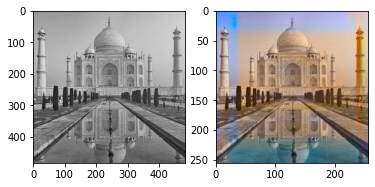

In [43]:
output = model.predict(X)
output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))